In [9]:
import os
import torch
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import segmentation_models_pytorch as smp

from pprint import pprint
from torch.utils.data import DataLoader

from src.dataset import SegmentationDataset
import logging
import os
from typing import Optional, Tuple

import pandas as pd
from torch.utils.data import DataLoader, Dataset
from src.config import DataConfig
from src.dataset import SegmentationDataset
from src.augmentations import get_transforms
from src.dataset_splitter import split_subsets

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
PATH = './data/'
df_path = os.path.normpath(os.path.join(PATH, 'annotations.tsv'))
df = pd.read_csv(df_path, delimiter='\t')
pprint(f'Original dataset: {len(df)}')
df = df.drop_duplicates()
df = df.drop(['code'], axis=1)
pprint(f'Final dataset: {len(df)}')

'Original dataset: 540'
'Final dataset: 482'


In [7]:
df.head(2)

,filename,x_from,y_from,width,height
0,images/c234c76c-d72d-4d60-8066-e99f62361c1c--r...,210,542,279,143
1,images/0.jpg,216,474,409,308


In [8]:
image = cv2.imread('data\\images\\0.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

(1333, 1000, 3)

In [11]:
# Example usage
image_directory = "C:\\Users\\julia\\CV\\01-SEGMENTATION\\data"

train_transforms = get_transforms(width=320, height=320, encoder = 'resnet34')
valid_transforms = get_transforms(width=320, height=320, encoder = 'resnet34', augmentations=False)
test_transforms = get_transforms(width=320, height=320, encoder = 'resnet34', augmentations=False)

train_df, valid_df, test_df = split_subsets(df, train_fraction=0.8)

train_dataset = SegmentationDataset(
    train_df,
    image_folder=image_directory,
    transforms=train_transforms)

valid_dataset = SegmentationDataset(
    valid_df,
    image_folder=image_directory,
    transforms=valid_transforms
)

test_dataset = SegmentationDataset(
    test_df,
    image_folder=image_directory,
    transforms=test_transforms
)

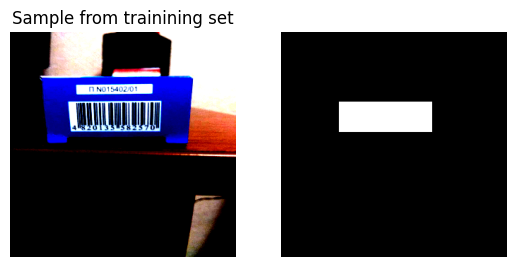

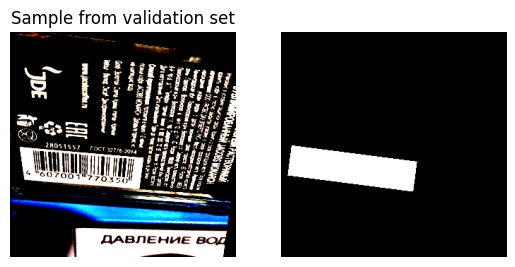

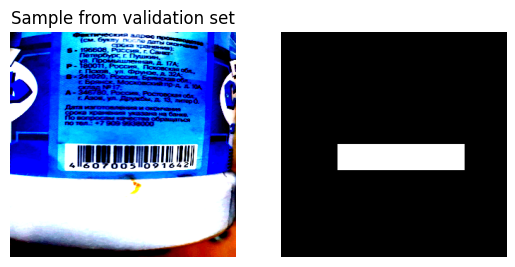

In [14]:
import matplotlib.pyplot as plt
import random

sample_img, sample_mask = train_dataset[random.choice(range(len(train_dataset)))]
sample_img = sample_img.permute(1, 2, 0)
plt.subplot(1,2,1)
plt.title("Sample from trainining set")
plt.axis("off")
plt.imshow(sample_img.squeeze())
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(sample_mask.squeeze(), cmap='gray')
plt.show()

sample_img, sample_mask = train_dataset[random.choice(range(len(valid_dataset)))]
sample_img = sample_img.permute(1, 2, 0)
plt.subplot(1,2,1)
plt.title("Sample from validation set")
plt.axis("off")
plt.imshow(sample_img.squeeze())
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(sample_mask.squeeze(), cmap='gray')
plt.show()

sample_img, sample_mask = train_dataset[random.choice(range(len(test_dataset)))]
sample_img = sample_img.permute(1, 2, 0)
plt.subplot(1,2,1)
plt.title("Sample from validation set")
plt.axis("off")
plt.imshow(sample_img.squeeze())
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(sample_mask.squeeze(), cmap='gray')
plt.show()